In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression

In [14]:
X,Y=make_regression(n_features=1,n_samples=100,noise=10)


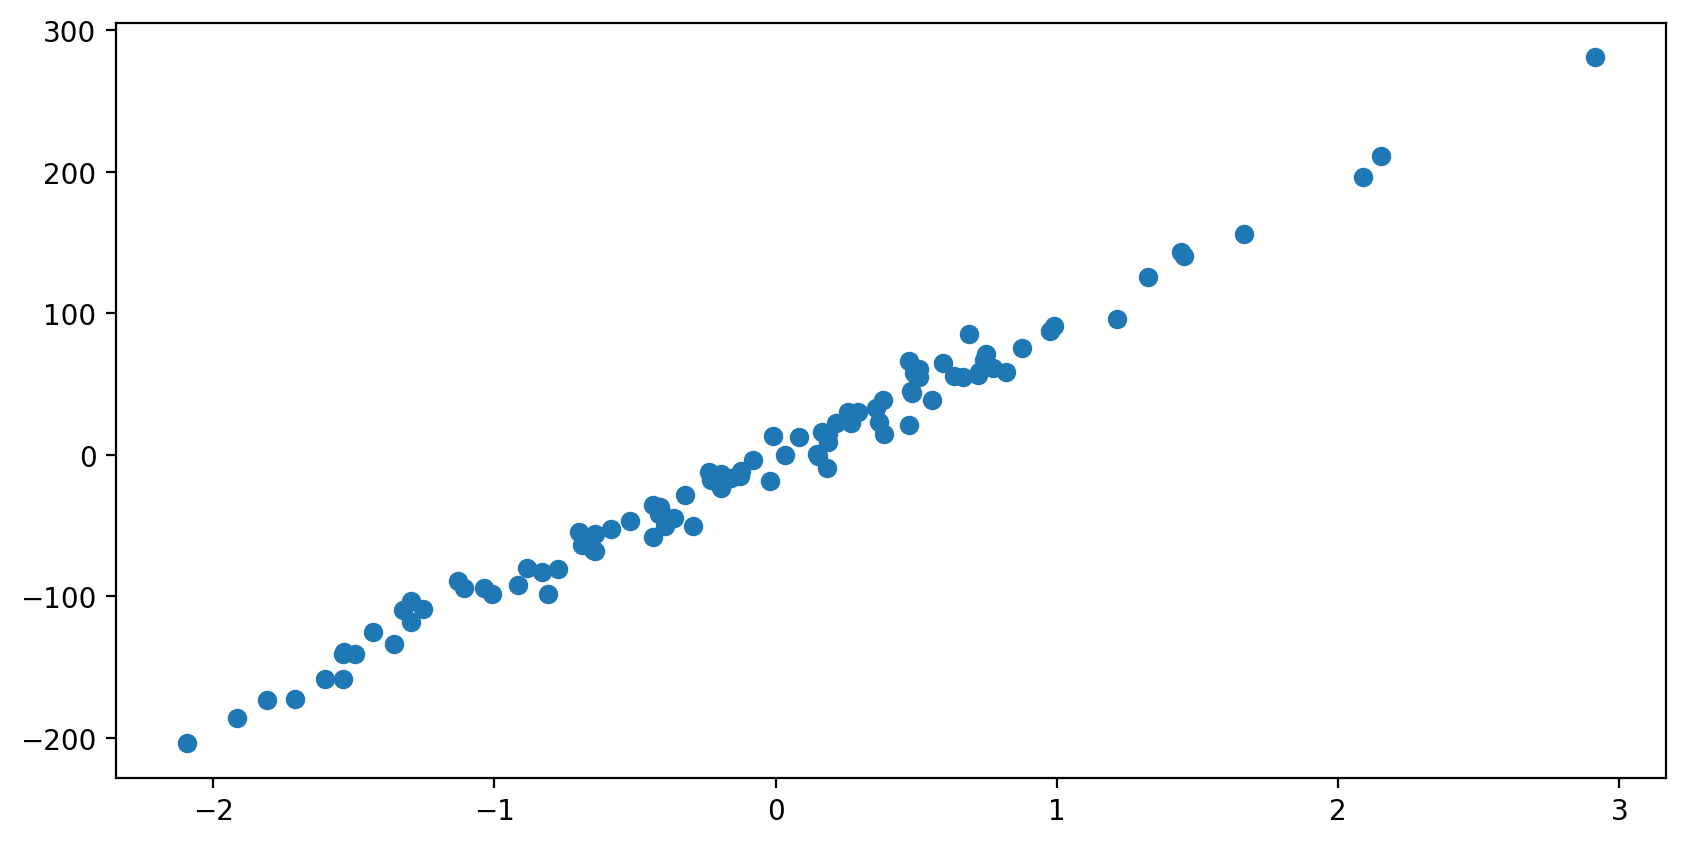

In [17]:
fig=plt.figure(figsize=(10,5),dpi=200)
plt.scatter(X,Y)

In [21]:
def regression():
    errors={}
    for c in np.arange(-1,1,0.1):
        for m in np.arange(50,70,0.1):
            Y=(m*X+c).reshape(-1)
            error=((Y-X)**2).mean()
            errors[error]=c,m
    return errors[min(errors)]

In [22]:
bias,weight=regression()


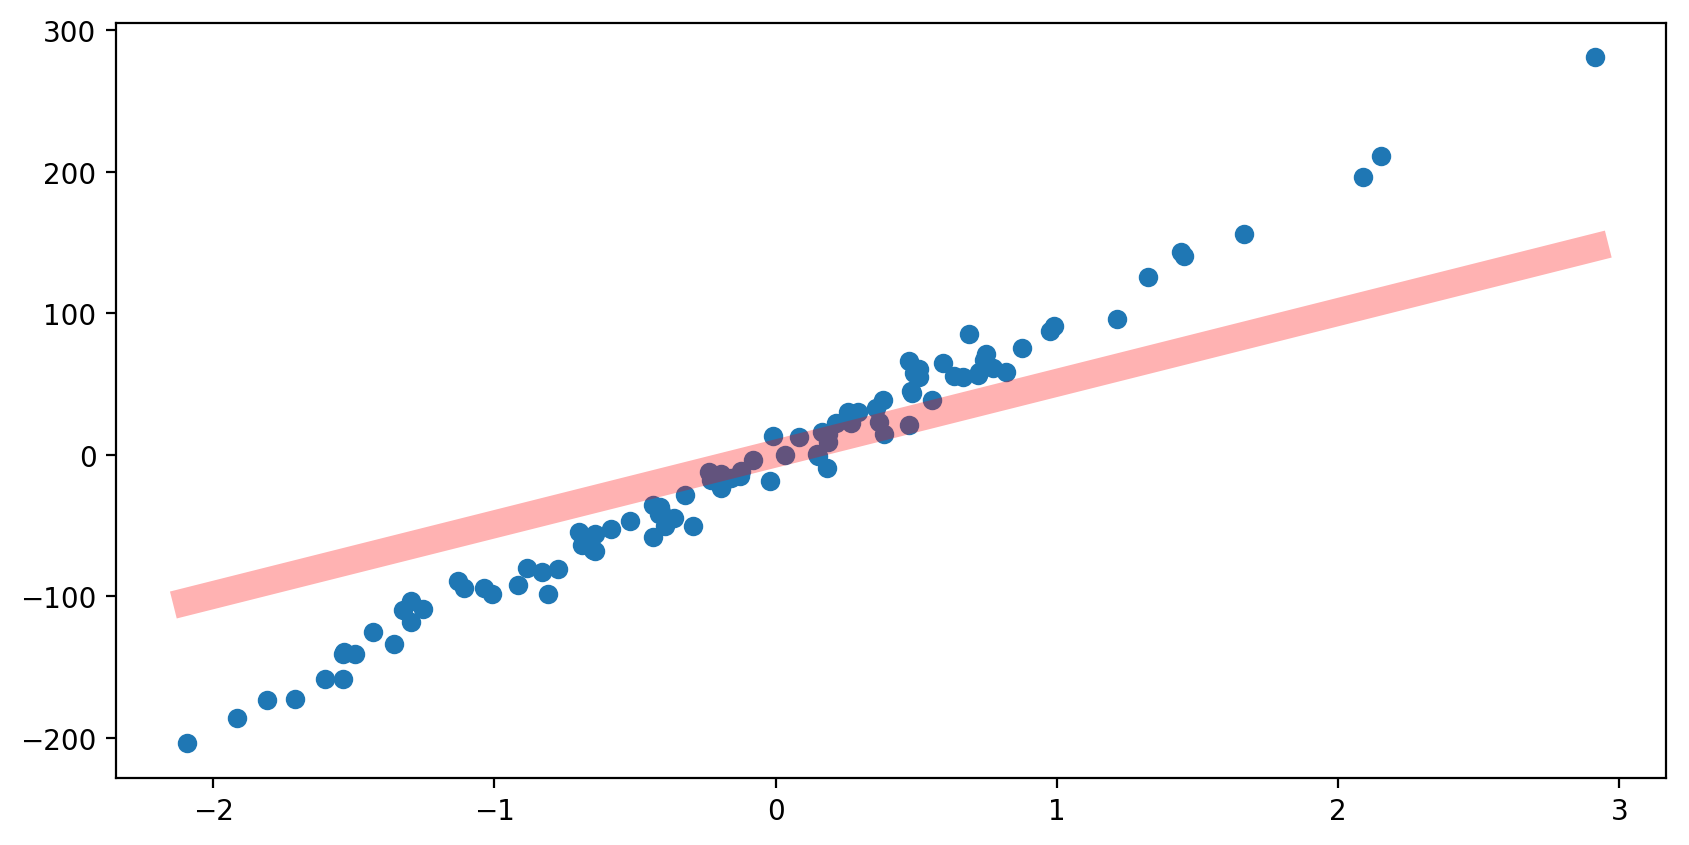

In [24]:
fig=plt.figure(figsize=(10,5),dpi=200)
predict=lambda x:weight*x+bias
plt.scatter(X,Y)
plt.plot([min(X),max(X)],[predict(min(X)),predict(max(X))],
        linewidth=10,color="r",alpha=0.3)

In [32]:
import numpy as np
from sklearn.datasets import make_regression
from termcolor import colored as c
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
%matplotlib inline

In [33]:
x,y=make_regression(100,noise=44,n_features=1)


In [45]:
def plot(x,y,label=""):
    fig=plt.figure(figsize=(10,5),dpi=150)
    ax=fig.add_subplot(111)
    ax.set_facecolor("white")
    ax.scatter(x,y,c="cyan",edgecolor="k",s=100,label=label)
    ax.legend(fontsize=20);
    return ax

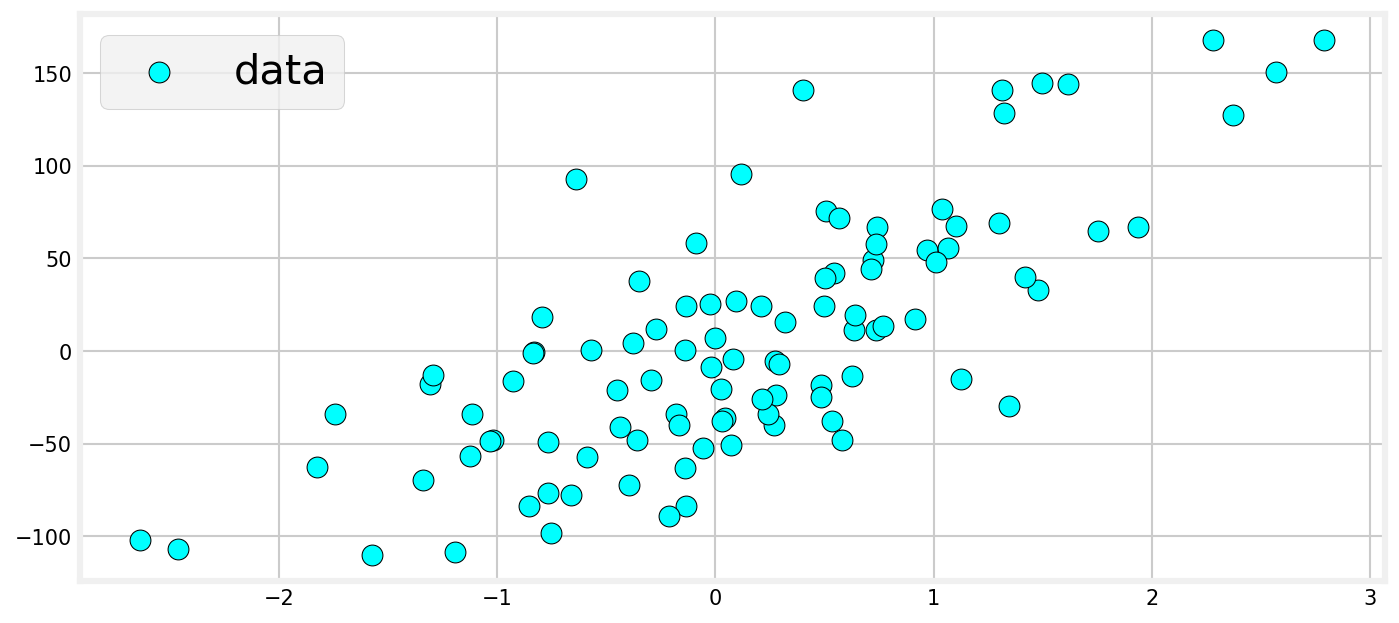

In [46]:
plot(x,y,"data")

In [50]:
def calculate_weight(x, y, epoch):
    print("Iteration", "Error", "Bias", "\tWeight", sep="\t\t\t")
    x = np.insert(x, 0, 1, axis=1)
    θ = np.zeros(len(x[0]))
    m = y.size
    print_interval = 1

    lr = 0.01

    for i in range(epoch):

        h = (x @ θ).reshape(-1, 1)

        error = ((y - h)**2).mean()

        θ = θ - lr * (1 / m) * (x.T.dot(h - y)).reshape(-1)

        if not i % print_interval:
            print_interval *= 2
            print(str(i).center(10), error, θ[0], θ[1], sep="\t\t")

    print(str(i+1).center(10),error, θ[0], θ[1], sep="\t\t")
    return θ


def Predict(p, θ):
    x = np.insert([p], 0, 1, axis=0)
    return x.dot(theta)

In [51]:
theta=calculate_weight(x.reshape(-1,1),
                      y.reshape(-1,1),1000)

Iteration			Error			Bias				Weight
    0     		4314.195682642137		0.05683838935373201		0.5061288099374193
    2     		4212.095582263134		0.1668022495019204		1.5023578134568734
    4     		4114.307692694154		0.2719448652085962		2.477596626458532
    8     		3930.938371796466		0.4683678196209851		4.366889454601211
    16    		3608.342566922384		0.8097456967489022		7.912703437734189
    32    		3107.8460879873137		1.3153159829731247		14.161531810943139
    64    		2499.4053267693344		1.8040832230069657		23.889953201051664
   128    		2032.1797215389345		1.678517592550079		35.79829600013178
   256    		1874.369358177354		0.4890619569138137		45.066937782872984
   512    		1861.0043106563244		-0.6073856189587216		48.27642359639033
   1000   		1860.8948417731895		-0.7970866222645857		48.558684586304864


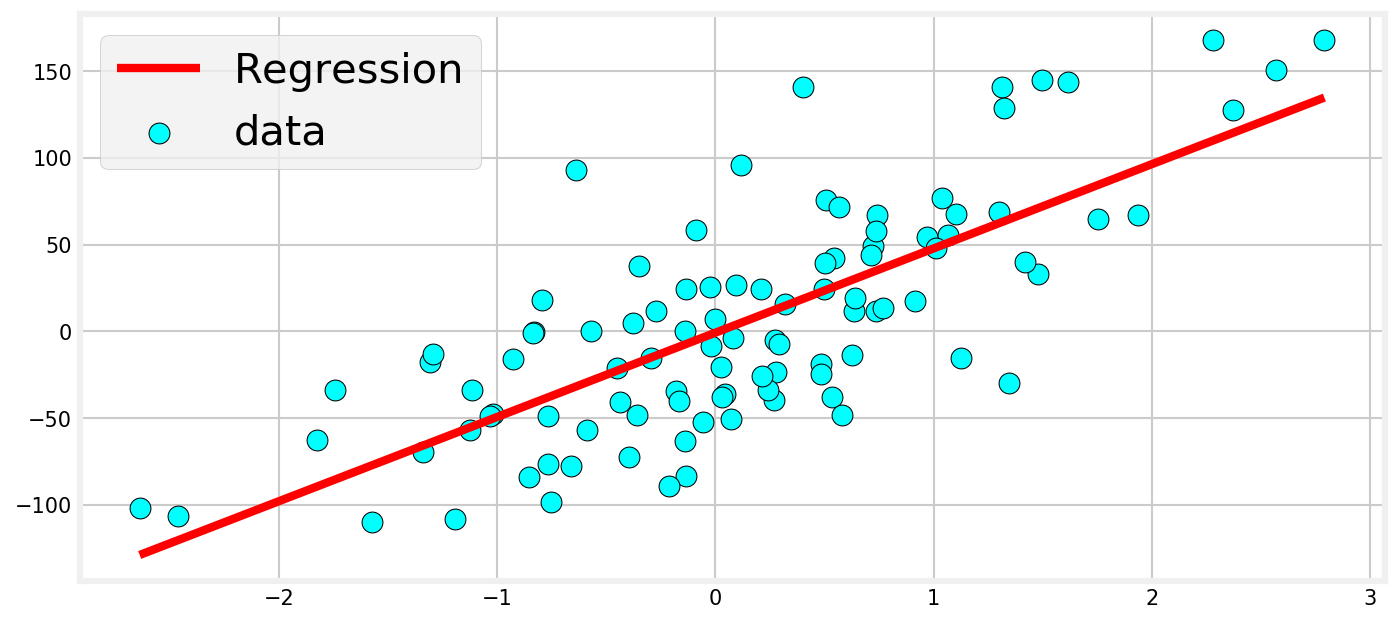

In [53]:
x_min,x_max=x.min(),x.max()
ax=plot(x,y,"data")
ax.plot([x_min,x_max],
       [Predict(x_min,theta),
       Predict(x_max,theta)],c="r",label="Regression")
ax.legend(fontsize=20)